## Configuración del Entorno y Librerías

### Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from tabulate import tabulate
from itertools import product

# Modelos de Machine Learning
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Boost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Model Selection y Validación
from sklearn.model_selection import (
    train_test_split, cross_val_score, learning_curve, validation_curve
)

# Métricas
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, precision_score, recall_score, f1_score
)

# Display modelo
from IPython.display import display

# Guardar el modelo
import joblib

## Carga de Datos

In [ ]:
data = pd.read_csv(r'docs\Propensity.csv', delimiter=',')

display(data)

,CODE;PRODUCTO;TIPO_CARROCERIA;COMBUSTIBLE;Potencia_;TRANS;FORMA_PAGO;ESTADO_CIVIL;GENERO;OcupaciOn;PROVINCIA;Campanna1;Campanna2;Campanna3;Zona _Renta;REV_Garantia;Averia_grave;QUEJA_CAC;COSTE_VENTA;km_anno;Revisiones;Edad Cliente
0,CLIX1;A;TIPO1;FUEL 1;Baja;M;Otros;CASADO;M;Emp...
1,CLIX2;A;TIPO1;FUEL 1;Baja;M;Otros;SOLTERO;M;Em...
2,CLIX3;A;TIPO1;FUEL 1;Baja;M;Contado;SOLTERO;F;...
3,CLIX4;A;TIPO1;FUEL 1;Baja;M;Contado;CASADO;F;E...
4,CLIX5;A;TIPO1;FUEL 1;Baja;M;Otros;CASADO;F;Emp...
...,...
11480,CLIX11481;E;TIPO2;FUEL 1;Media;M;Otros;CASADO;...
11481,CLIX11482;E;TIPO2;FUEL 1;Media;M;Contado;CASAD...
11482,CLIX11483;E;TIPO2;FUEL 1;Alta;M;Financiera Mar...
11483,CLIX11484;F;TIPO3;FUEL 1;Alta;M;Contado;CASADO...


In [ ]:
data.dtypes

CODE;PRODUCTO;TIPO_CARROCERIA;COMBUSTIBLE;Potencia_;TRANS;FORMA_PAGO;ESTADO_CIVIL;GENERO;OcupaciOn;PROVINCIA;Campanna1;Campanna2;Campanna3;Zona _Renta;REV_Garantia;Averia_grave;QUEJA_CAC;COSTE_VENTA;km_anno;Revisiones;Edad Cliente    object
dtype: object

In [ ]:
print(len(data.columns))

1


In [ ]:
# Columnas de tipo object
columnas_interes_object = [
    'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia', 'TRANS', 
    'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'PROVINCIA', 'Campanna1', 
]

for col in columnas_interes_object:
    print(f"-> {col}: {data[col].unique()}")
    


KeyError: 'CODE'

In [ ]:
# Columnas de tipo int64 y bool
columnas_interes_numericas = [
    'Campanna2', 'Campanna3', 'Zona_Renta', 'REV_Garantia', 'Averia_grave', 'QUEJA_CAC', 'COSTE_VENTA', 'km_anno', 'Revisiones', 'Edad_Cliente', 'Tiempo', 'Mas_1_coche'
]

for col in columnas_interes_numericas:
    print(f"-> {col}: {data[col].unique()}")


-> Campanna2: ['NO' 'SI']
-> Campanna3: ['NO' 'SI']
-> Zona_Renta: ['Medio-Bajo' 'Medio' 'Alto' nan 'Otros']
-> REV_Garantia: ['NO DATA' 'SI']
-> Averia_grave: ['Averia muy grave' 'No' 'Averia leve' 'Averia grave' nan]
-> QUEJA_CAC: ['SI' 'NO']
-> COSTE_VENTA: [2892 1376 2015 ... 2278 4655 7151]
-> km_anno: [    0  7187  7256 ...  3787  9219 10441]
-> Revisiones: [ 2  4  3  1  0  7  6  5  8 10  9 12 11 13]
-> Edad_Cliente: [18 53 21 48 56 24 51 44 20 32 52 55 27 26 54 38 46 37 31 45 23 49 57 30
 39 19 29 60 28 25 58 22 50 42 47 62 61 59 41 40 43 64 68 67 69 70 35 71
 34 66 63 33 65 36]
-> Tiempo: [ 0  3  5  4  8  7  6  9  2 10 13 11 14 12]
-> Mas_1_coche: [False  True]


In [ ]:
data.describe()

,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Tiempo
count,58049.000000,58049.000000,58049.000000,58049.000000,58049.000000
mean,2540.125756,11805.893607,3.529587,47.351255,1.859119
std,1603.556511,10205.363971,2.528413,11.239984,3.091309
min,0.000000,0.000000,0.000000,18.000000,0.000000
25%,1595.000000,0.000000,1.000000,40.000000,0.000000
50%,2353.000000,11486.000000,3.000000,48.000000,0.000000
75%,3301.000000,17927.000000,5.000000,56.000000,4.000000
max,18455.000000,182331.000000,13.000000,71.000000,14.000000


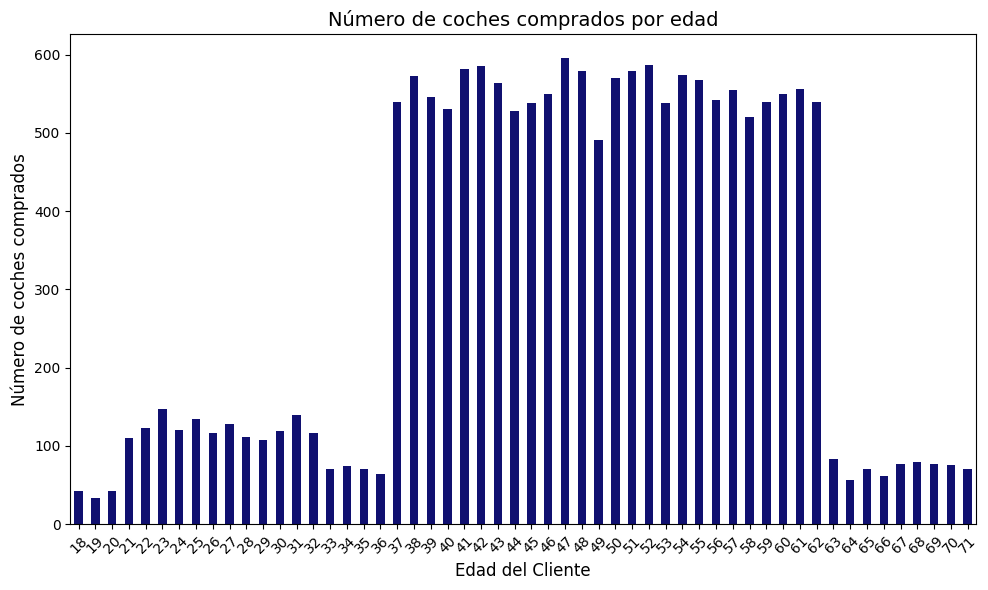

In [ ]:
# Si 'Mas_1_coche' es un booleano, puedes convertirlo a un valor entero (1 o 0)
data['Mas_1_coche'] = data['Mas_1_coche'].astype(int)

# Agrupar por edad y contar el número de coches comprados (suma de la columna 'Mas_1_coche')
compras_por_edad = data.groupby('Edad_Cliente')['Mas_1_coche'].sum()

# Graficar la comparación
plt.figure(figsize=(10, 6))
compras_por_edad.plot(kind='bar', color='#101070')  # Usando tu color preferido (Dark Blue)

plt.title('Número de coches comprados por edad', fontsize=14)
plt.xlabel('Edad del Cliente', fontsize=12)
plt.ylabel('Número de coches comprados', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

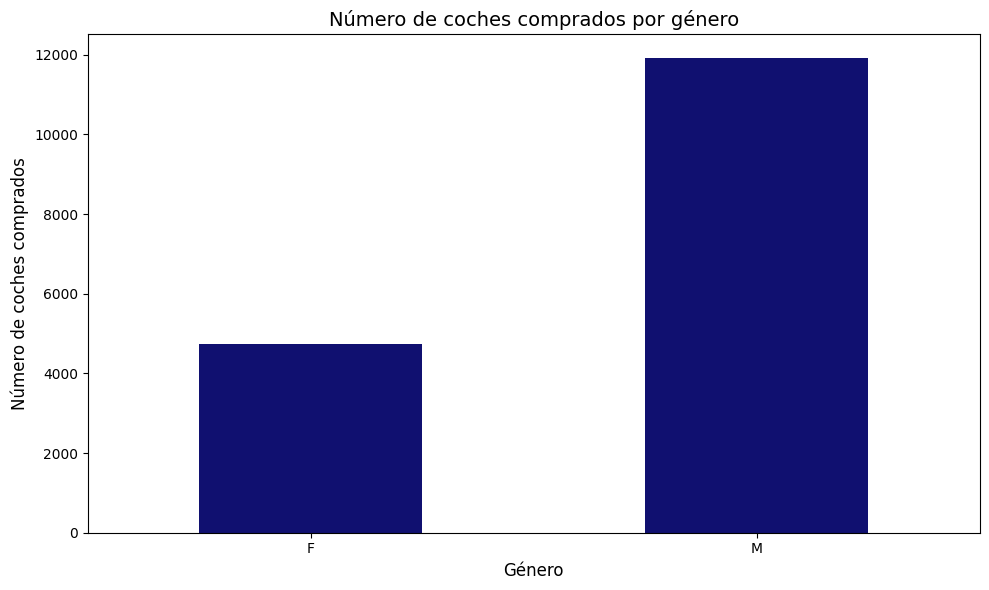

In [ ]:
# Agrupar por género y contar el número de coches comprados (suma de la columna 'Mas_1_coche')
compras_por_genero = data.groupby('GENERO')['Mas_1_coche'].sum()

# Graficar la comparación por género
plt.figure(figsize=(10, 6))
compras_por_genero.plot(kind='bar', color='#101070')

plt.title('Número de coches comprados por género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de coches comprados', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


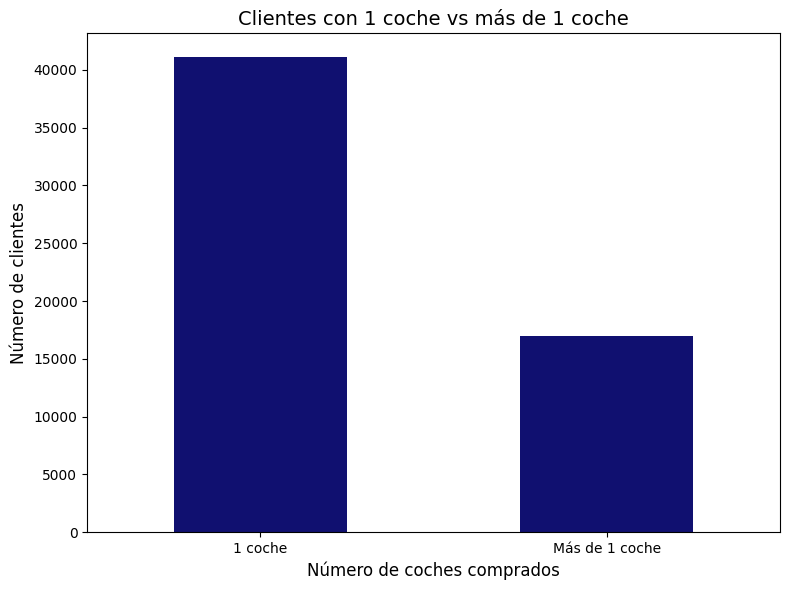

In [ ]:
# Agrupar por la categoría de coches comprados (1 o más) y contar el número de clientes en cada categoría
compras_1_vs_mas1 = data.groupby('Mas_1_coche').size()

# Graficar la comparación de clientes con 1 coche o más
plt.figure(figsize=(8, 6))
compras_1_vs_mas1.plot(kind='bar', color='#101070')

plt.title('Clientes con 1 coche vs más de 1 coche', fontsize=14)
plt.xlabel('Número de coches comprados', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['1 coche', 'Más de 1 coche'], rotation=0)
plt.tight_layout()

plt.show()


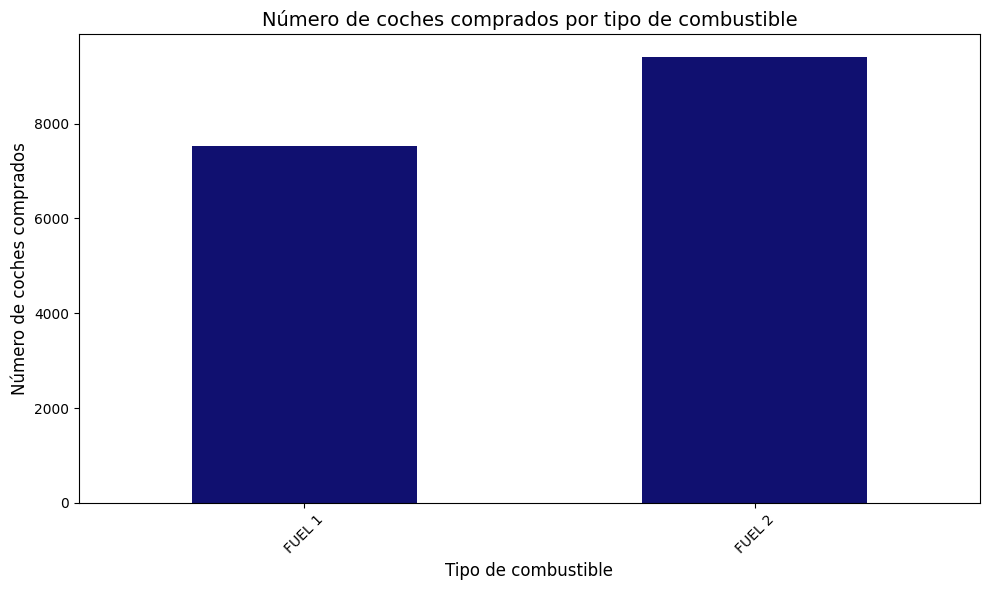

In [ ]:
# Agrupar por tipo de combustible y contar el número de coches comprados (suma de la columna 'Mas_1_coche')
compras_por_combustible = data.groupby('COMBUSTIBLE')['Mas_1_coche'].sum()

# Graficar la comparación por tipo de combustible
plt.figure(figsize=(10, 6))
compras_por_combustible.plot(kind='bar', color='#101070')

plt.title('Número de coches comprados por tipo de combustible', fontsize=14)
plt.xlabel('Tipo de combustible', fontsize=12)
plt.ylabel('Número de coches comprados', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
# Supongamos que 'data' es tu DataFrame
# Filtrar los datos donde Mas_1_coche es True
data_multiple_cars = data[data['Mas_1_coche'] == True]

# Contar la frecuencia de cada variable
frequencies = {
    'TIPO_CARROCERIA': data_multiple_cars['TIPO_CARROCERIA'].value_counts(),
    'ESTADO_CIVIL': data_multiple_cars['ESTADO_CIVIL'].value_counts(),
    'GENERO': data_multiple_cars['GENERO'].value_counts(),
    'PROVINCIA': data_multiple_cars['PROVINCIA'].value_counts(),
    'Campanna1': data_multiple_cars['Campanna1'].value_counts(),
    'Campanna2': data_multiple_cars['Campanna2'].value_counts(),
    'Campanna3': data_multiple_cars['Campanna3'].value_counts(),
    'Zona_Renta': data_multiple_cars['Zona_Renta'].value_counts(),
    'REV_Garantia': data_multiple_cars['REV_Garantia'].value_counts(),
    'Revisiones': data_multiple_cars['Revisiones'].value_counts(),
    'Edad_Cliente': data_multiple_cars['Edad_Cliente'].value_counts(),
}

# Mostrar los resultados
for var, count in frequencies.items():
    print(f"Frecuencias de la variable {var}:")
    print(count)
    print("-" * 50)

Frecuencias de la variable TIPO_CARROCERIA:
TIPO_CARROCERIA
TIPO1    7253
TIPO7    5039
TIPO6    2442
TIPO4     959
TIPO8     869
TIPO2     362
TIPO3      14
TIPO5       4
Name: count, dtype: int64
--------------------------------------------------
Frecuencias de la variable ESTADO_CIVIL:
ESTADO_CIVIL
CASADO       12982
SOLTERO       2957
EN PAREJA      406
OTROS          302
Name: count, dtype: int64
--------------------------------------------------
Frecuencias de la variable GENERO:
GENERO
M    11916
F     4742
Name: count, dtype: int64
--------------------------------------------------
Frecuencias de la variable PROVINCIA:
PROVINCIA
Madrid                    4439
Barcelona                 3053
Pontevedra                 639
Valencia                   555
Alicante                   507
Lacoruna                   486
Sevilla                    464
Malaga                     399
Vizcaya                    370
Baleares                   325
Zaragoza                   323
Gerona        

### Label Encoding (Para columnas ordinales)
-> random 

In [ ]:
# Lista de columnas ordinales para Label Encoding
label_columns = ['PRODUCTO', 'TIPO_CARROCERIA', 'FORMA_PAGO', 'ESTADO_CIVIL', 'OcupaciOn', 'PROVINCIA', 'Zona_Renta', 'COSTE_VENTA', 'km_anno', 'Revisiones', 'Edad_Cliente', 'Tiempo']  

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Aplicar Label Encoding a las columnas ordinales
for col in label_columns:
    data[col] = le.fit_transform(data[col])  

# Mostrar el DataFrame con las columnas codificadas
print(data.head())

   CODE  PRODUCTO  TIPO_CARROCERIA COMBUSTIBLE Potencia TRANS  FORMA_PAGO  \
0  CLI1         0                0      FUEL 1     Baja     M           0   
1  CLI2         0                0      FUEL 1     Baja     M           0   
2  CLI3         0                0      FUEL 1     Baja     M           3   
3  CLI4         0                0      FUEL 1     Baja     M           2   
4  CLI5         0                0      FUEL 1     Baja     M           2   

   ESTADO_CIVIL GENERO  OcupaciOn  ...  Zona_Renta REV_Garantia  \
0             0      M          1  ...           2      NO DATA   
1             0      F          1  ...           2           SI   
2             0      M          1  ...           1      NO DATA   
3             0      F          1  ...           1           SI   
4             0      F          2  ...           0      NO DATA   

       Averia_grave QUEJA_CAC  COSTE_VENTA km_anno Mas_1_coche Revisiones  \
0  Averia muy grave        SI         1010       0       

### One-Hot Encoding (Para columnas nominales)
->1/0

In [ ]:
# Lista de columnas nominales para One-Hot Encoding
one_hot_columns = ['Mas_1_coche', 'COMBUSTIBLE', 'GENERO', 'TRANS', 'Campanna1', 'Campanna2', 'Campanna3', 'REV_Garantia', 'QUEJA_CAC']  

# Aplicar One-Hot Encoding a las columnas nominales
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)  # drop_first=True para evitar la multicolinealidad

# Mostrar el DataFrame con las columnas codificadas
print(data.head())


   CODE  PRODUCTO  TIPO_CARROCERIA Potencia  FORMA_PAGO  ESTADO_CIVIL  \
0  CLI1         0                0     Baja           0             0   
1  CLI2         0                0     Baja           0             0   
2  CLI3         0                0     Baja           3             0   
3  CLI4         0                0     Baja           2             0   
4  CLI5         0                0     Baja           2             0   

   OcupaciOn  PROVINCIA  Zona_Renta      Averia_grave  ...  Tiempo  \
0          1          4           2  Averia muy grave  ...       0   
1          1         47           2                No  ...       0   
2          1         30           1                No  ...       2   
3          1         32           1  Averia muy grave  ...       4   
4          2         41           0                No  ...       2   

   Mas_1_coche_1  COMBUSTIBLE_FUEL 2  GENERO_M  TRANS_M  Campanna1_SI  \
0          False               False      True     True          Tr

In [ ]:
data

,CODE,PRODUCTO,TIPO_CARROCERIA,Potencia,FORMA_PAGO,ESTADO_CIVIL,OcupaciOn,PROVINCIA,Zona_Renta,Averia_grave,...,Tiempo,Mas_1_coche_1,COMBUSTIBLE_FUEL 2,GENERO_M,TRANS_M,Campanna1_SI,Campanna2_SI,Campanna3_SI,REV_Garantia_SI,QUEJA_CAC_SI
0,CLI1,0,0,Baja,0,0,1,4,2,Averia muy grave,...,0,False,False,True,True,True,False,False,False,True
1,CLI2,0,0,Baja,0,0,1,47,2,No,...,0,False,False,False,True,False,False,False,True,False
2,CLI3,0,0,Baja,3,0,1,30,1,No,...,2,True,False,True,True,False,False,False,False,False
3,CLI4,0,0,Baja,2,0,1,32,1,Averia muy grave,...,4,True,False,False,True,True,False,False,True,True
4,CLI5,0,0,Baja,2,0,2,41,0,No,...,2,True,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58044,CLI57905,5,2,Alta,0,3,1,32,4,Averia muy grave,...,0,False,False,False,True,False,False,False,True,True
58045,CLI57926,10,6,Alta,0,4,1,2,2,No,...,0,False,False,False,False,False,False,False,False,True
58046,CLI57952,10,6,Alta,0,0,1,32,1,No,...,0,False,False,True,False,False,True,False,False,False
58047,CLI58038,6,4,Media,0,0,1,52,2,No,...,0,False,True,True,True,False,False,False,False,False


### Ordinal Encoding (Para columnas con un orden específico)
-> orden

In [ ]:
# Rellenar los valores nulos con 'Desconocido' o un valor que tenga sentido
data['Potencia'] = data['Potencia'].fillna('Desconocido')
data['Averia_grave'] = data['Averia_grave'].fillna('Desconocido')

# Lista de columnas para Ordinal Encoding junto con sus categorías ordenadas
ordinal_columns = {
    'Potencia': ['Desconocido', 'Baja', 'Media', 'Alta'],   
    'Averia_grave': ['Desconocido', 'No', 'Averia leve', 'Averia grave', 'Averia muy grave']  
}

# Crear un objeto OrdinalEncoder
ord_enc = OrdinalEncoder()

# Aplicar Ordinal Encoding a las columnas con un orden específico
for col, categories in ordinal_columns.items():
    ord_enc.categories = [categories]  # Especificar el orden de las categorías
    data[col] = ord_enc.fit_transform(data[[col]])  # Actualizar directamente la columna con el encoding

# Mostrar el DataFrame con las columnas codificadas
print(data.head())


   CODE  PRODUCTO  TIPO_CARROCERIA  Potencia  FORMA_PAGO  ESTADO_CIVIL  \
0  CLI1         0                0       1.0           0             0   
1  CLI2         0                0       1.0           0             0   
2  CLI3         0                0       1.0           3             0   
3  CLI4         0                0       1.0           2             0   
4  CLI5         0                0       1.0           2             0   

   OcupaciOn  PROVINCIA  Zona_Renta  Averia_grave  ...  Tiempo  Mas_1_coche_1  \
0          1          4           2           4.0  ...       0          False   
1          1         47           2           1.0  ...       0          False   
2          1         30           1           1.0  ...       2           True   
3          1         32           1           4.0  ...       4           True   
4          2         41           0           1.0  ...       2           True   

   COMBUSTIBLE_FUEL 2  GENERO_M  TRANS_M  Campanna1_SI  Campanna2_SI

In [ ]:
data

,CODE,PRODUCTO,TIPO_CARROCERIA,Potencia,FORMA_PAGO,ESTADO_CIVIL,OcupaciOn,PROVINCIA,Zona_Renta,Averia_grave,...,Tiempo,Mas_1_coche_1,COMBUSTIBLE_FUEL 2,GENERO_M,TRANS_M,Campanna1_SI,Campanna2_SI,Campanna3_SI,REV_Garantia_SI,QUEJA_CAC_SI
0,CLI1,0,0,1.0,0,0,1,4,2,4.0,...,0,False,False,True,True,True,False,False,False,True
1,CLI2,0,0,1.0,0,0,1,47,2,1.0,...,0,False,False,False,True,False,False,False,True,False
2,CLI3,0,0,1.0,3,0,1,30,1,1.0,...,2,True,False,True,True,False,False,False,False,False
3,CLI4,0,0,1.0,2,0,1,32,1,4.0,...,4,True,False,False,True,True,False,False,True,True
4,CLI5,0,0,1.0,2,0,2,41,0,1.0,...,2,True,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58044,CLI57905,5,2,3.0,0,3,1,32,4,4.0,...,0,False,False,False,True,False,False,False,True,True
58045,CLI57926,10,6,3.0,0,4,1,2,2,1.0,...,0,False,False,False,False,False,False,False,False,True
58046,CLI57952,10,6,3.0,0,0,1,32,1,1.0,...,0,False,False,True,False,False,True,False,False,False
58047,CLI58038,6,4,2.0,0,0,1,52,2,1.0,...,0,False,True,True,True,False,False,False,False,False


In [ ]:
data.dtypes

CODE                   object
PRODUCTO                int64
TIPO_CARROCERIA         int64
Potencia              float64
FORMA_PAGO              int64
ESTADO_CIVIL            int64
OcupaciOn               int64
PROVINCIA               int64
Zona_Renta              int64
Averia_grave          float64
COSTE_VENTA             int64
km_anno                 int64
Revisiones              int64
Edad_Cliente            int64
Tiempo                  int64
Mas_1_coche_1            bool
COMBUSTIBLE_FUEL 2       bool
GENERO_M                 bool
TRANS_M                  bool
Campanna1_SI             bool
Campanna2_SI             bool
Campanna3_SI             bool
REV_Garantia_SI          bool
QUEJA_CAC_SI             bool
dtype: object

# Gradient Boosting

In [ ]:
# Asumiendo que ya tienes los datos codificados en 'data'
# La columna 'Mas_1_coche' es la que queremos predecir

# Definir las características (X) y la variable objetivo (y)
X = data.drop(columns=['Mas_1_coche_1', 'CODE', 'Tiempo'])  # Eliminamos la columna objetivo de las características
y = data['Mas_1_coche_1']  # La columna objetivo (si vuelve a comprar o no)

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X)

       PRODUCTO  TIPO_CARROCERIA  Potencia  FORMA_PAGO  ESTADO_CIVIL  \
0             0                0       1.0           0             0   
1             0                0       1.0           0             0   
2             0                0       1.0           3             0   
3             0                0       1.0           2             0   
4             0                0       1.0           2             0   
...         ...              ...       ...         ...           ...   
58044         5                2       3.0           0             3   
58045        10                6       3.0           0             4   
58046        10                6       3.0           0             0   
58047         6                4       2.0           0             0   
58048         6                4       2.0           0             2   

       OcupaciOn  PROVINCIA  Zona_Renta  Averia_grave  COSTE_VENTA  ...  \
0              1          4           2           4.0       

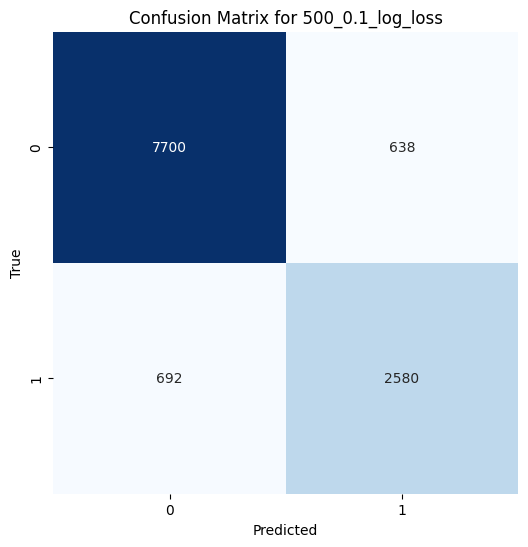


Classification Report for 500_0.1_log_loss:
              precision    recall  f1-score   support

       False       0.92      0.92      0.92      8338
        True       0.80      0.79      0.80      3272

    accuracy                           0.89     11610
   macro avg       0.86      0.86      0.86     11610
weighted avg       0.88      0.89      0.89     11610



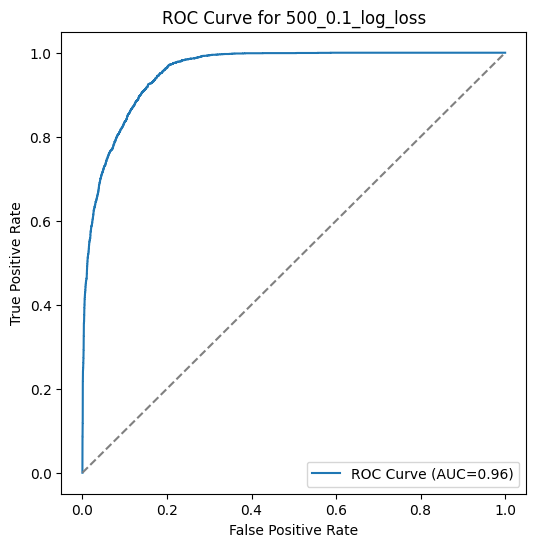

,model_id,accuracy,f1_score,recall,roc_auc,train_score,overfitting


In [ ]:
# Definir los hiperparámetros fijos (sin cambios)
param_grid_gb = {
    'n_estimators': [500],  # Número original de árboles
    'learning_rate': [0.1],  # Usar solo 0.1 como en el ejemplo
    'loss': ['log_loss'],  # Cambiar 'deviance' a 'log_loss'
    'min_samples_split': [2],  # Fijo en 2
    'min_samples_leaf': [2],  # Fijo en 2
    'max_depth': [7],  # Profundidades limitadas
    'subsample': [0.8],  # Submuestra fija para evitar sobreajuste
}

# Almacenar resultados y modelos
results_gb = []
models_dict_gb = {}

# Iterar sobre las combinaciones de hiperparámetros (ahora solo se ejecutará una vez por cada combinación)
for params in product(*param_grid_gb.values()):
    n_estimators, learning_rate, loss, min_samples_split, min_samples_leaf, max_depth, subsample = params

    # Construir el modelo Gradient Boosting con los hiperparámetros actuales
    model_gb = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        loss=loss,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_depth=max_depth,
        subsample=subsample,
        random_state=42
    )

    # Entrenar el modelo
    model_gb.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model_gb.predict(X_test)

    # Calcular métricas
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model_gb.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Calcular Train Score
    train_score = model_gb.score(X_train, y_train)

    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # Guardar los resultados
    results_gb.append({
        'model_id': f"{n_estimators}_{learning_rate}_{loss}_{min_samples_split}_{min_samples_leaf}_{max_depth}_{subsample}",
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

    # Mostrar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {n_estimators}_{learning_rate}_{loss}')
    plt.show()

    # Mostrar el reporte de clasificación
    print(f"\nClassification Report for {n_estimators}_{learning_rate}_{loss}:")
    print(classification_report(y_test, y_pred))

    # Mostrar la curva ROC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {n_estimators}_{learning_rate}_{loss}')
        plt.legend()
        plt.show()

# Convertir resultados a DataFrame
results_gb_df = pd.DataFrame(results_gb)

# Si hay resultados, mostrar los mejores modelos
if not results_gb_df.empty:
    # Ordenar por F1 Score
    results_gb_df = results_gb_df.sort_values(by=['f1_score'], ascending=False)

    # Mostrar los 3 mejores modelos sin sobreajuste
    best_models_gb = results_gb_df[results_gb_df['overfitting'] == 'OK'].head(3)
    
    display(best_models_gb)
else:
    print("No se encontraron resultados.")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from itertools import product

# Definir los hiperparámetros fijos (sin cambios)
param_grid_gb = {
    'n_estimators': [500],  # Número original de árboles
    'learning_rate': [0.1],  # Usar solo 0.1 como en el ejemplo
    'loss': ['log_loss'],  # Cambiar 'deviance' a 'log_loss'
    'min_samples_split': [2],  # Fijo en 2
    'min_samples_leaf': [2],  # Fijo en 2
    'max_depth': [7],  # Profundidades limitadas
    'subsample': [0.8],  # Submuestra fija para evitar sobreajuste
}

# Almacenar resultados y modelos
results_gb = []
models_dict_gb = {}

# Iterar sobre las combinaciones de hiperparámetros (ahora solo se ejecutará una vez por cada combinación)
for params in product(*param_grid_gb.values()):
    n_estimators, learning_rate, loss, min_samples_split, min_samples_leaf, max_depth, subsample = params

    # Construir el modelo Gradient Boosting con los hiperparámetros actuales
    model_gb = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        loss=loss,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_depth=max_depth,
        subsample=subsample,
        random_state=42
    )

    # Entrenar el modelo
    model_gb.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model_gb.predict(X_test)

    # Calcular métricas
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model_gb.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Validación cruzada
    cv_scores = cross_val_score(model_gb, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)

    # Calcular Train Score
    train_score = model_gb.score(X_train, y_train)

    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # Guardar los resultados
    results_gb.append({
        'model_id': f"{n_estimators}_{learning_rate}_{loss}_{min_samples_split}_{min_samples_leaf}_{max_depth}_{subsample}",
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'train_score': train_score,
        'mean_cv_score': mean_cv_score,
        'overfitting': overfitting_warning
    })

    # Mostrar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {n_estimators}_{learning_rate}_{loss}')
    plt.show()

    # Mostrar el reporte de clasificación
    print(f"\nClassification Report for {n_estimators}_{learning_rate}_{loss}:")
    print(classification_report(y_test, y_pred))

    # Mostrar la curva ROC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {n_estimators}_{learning_rate}_{loss}')
        plt.legend()
        plt.show()

# Convertir resultados a DataFrame
results_gb_df = pd.DataFrame(results_gb)

# Si hay resultados, mostrar los mejores modelos
if not results_gb_df.empty:
    # Ordenar por F1 Score
    results_gb_df = results_gb_df.sort_values(by=['f1_score'], ascending=False)

    # Mostrar los 3 mejores modelos sin sobreajuste
    best_models_gb = results_gb_df[results_gb_df['overfitting'] == 'OK'].head(3)
    
    display(best_models_gb)
else:
    print("No se encontraron resultados.")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Definir los mejores hiperparámetros (según lo que ya tienes)
best_params = {
    'n_estimators': 500,
    'learning_rate': 0.1,
    'loss': 'log_loss',
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_depth': 7,
    'subsample': 0.8
}

# Crear el modelo con los mejores hiperparámetros
model_gb = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    loss=best_params['loss'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_depth=best_params['max_depth'],
    subsample=best_params['subsample'],
    random_state=42
)

# Entrenar el modelo
model_gb.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model_gb.predict(X_test)

# Calcular métricas
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Calcular ROC-AUC si hay más de una clase
if len(np.unique(y_test)) > 1:
    y_pred_proba = model_gb.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
else:
    roc_auc = None

# Validación cruzada
cv_scores = cross_val_score(model_gb, X_train, y_train, cv=5)
mean_cv_score = np.mean(cv_scores)

# Calcular Train Score
train_score = model_gb.score(X_train, y_train)

# Determinar si hay sobreajuste
if train_score > 1.5 * mean_cv_score:
    overfitting_warning = "SEVERE OVERFITTING"
elif train_score > 1.2 * mean_cv_score:
    overfitting_warning = "DANGER"
elif train_score > 1.1 * mean_cv_score:
    overfitting_warning = "MILD OVERFITTING"
else:
    overfitting_warning = "OK"

# Mostrar los resultados
print(f"Modelo con hiperparámetros: {best_params}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")
print(f"Train Score: {train_score}")
print(f"Mean CV Score: {mean_cv_score}")
print(f"Overfitting: {overfitting_warning}")

# Mostrar el reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Mostrar la curva ROC si hay más de una clase
if len(np.unique(y_test)) > 1:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

## Importancias de las características

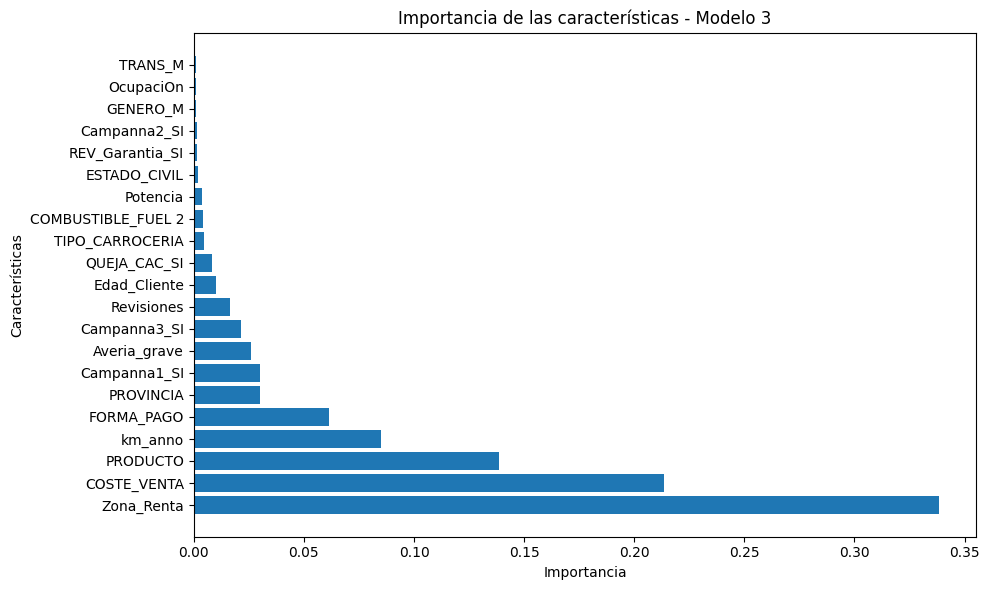

In [ ]:
# Obtener y graficar las importancias de las características
importances = best_models_gb.feature_importances_
features = X_train.columns  # Asegúrate de que X_train tenga las columnas correctas

indices = np.argsort(importances)[::-1]

# Crear la gráfica de barras horizontal (ahora las características estarán en el eje y)
plt.figure(figsize=(10, 6))
plt.barh(features[indices], importances[indices], align='center')  # Usar barh para gráfico horizontal
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title(f'Importancia de las características - Modelo {index + 1}')
plt.tight_layout()
plt.show()

## Guardar modelo


In [ ]:
joblib.dump(best_models_gb, 'modelo_gb_entrenado.pkl')